# **<span style="font-family: 'Palatino Linotype', serif;">🌿 A Decisão se Plantar!</span>**

*<span style="font-family: 'Angilla Tattoo'"> Agora estamos em um terreno onde decisões precisarão ser tomadas, e como guardiãos de tudo aquilo que é morbido também temos que conhecer bem o que é contário ao sepulcro, a vida. Então, entre tantos galhos secos iremos plantar!!!  <br> <br> Nossos algoritmos são oráculos, nossos dados são ossos ancestrais. <br> Sepulcro de Delfos </span>*

<div align="center">
    <img src="assets\mapas\3.png" alt="Mapa: A Batalha Final">
    <figcaption>Bem-vindo ao que (talvez) já foi uma floresta!</figcaption>
</div>

---

**Trabalho Final: 🌳Estudando o modelo Árvore de Decisão**
==========================================================



**Autores:** Sepulcro de Delfos

* Ana Luz

* Caio Ruas

* Caio Matheus

* Giovana Martins

## 🚩 **Introdução**

Este é o terceiro de uma série de 4 notebooks que compõem o trabalho final da disciplina de Aprendizado de Máquina. Recomenda-se a leitura dos notebooks anteriores, que contém a descrição do problema, a análise exploratória dos dados e a aplicação de outro algoritmo, eles podem ser acessados aqui [link].

O presente trabalho tem como objetivo a implementação de um modelo de classificação baseado no algoritmo da árvore de decisão para prever o *band gap* de materiais para aplicação em células solares.

## 📗Sabedorias utilizadas

Vamos importar as bibliotecas necessárias:

In [14]:
import plotly.express as px

import optuna
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

optuna.logging.set_verbosity(optuna.logging.WARNING) # Essa linha de código suprime os logs do optuna, facilitando a leitura do notebook.

## 👨‍🌾Preparando o Terreno...

Primeiramente vamos carregar os dados que iremos ultilizar nesse trabalho. Os quais já foram devidamente apresentados no notebook introdutório, por isso pularemos etapas descritivas ou exploratórias.

In [2]:
df = pd.read_csv("materials_trabalhado.csv")
print(df)

      Unnamed: 0.1  Unnamed: 0 material_id  theoretical  band_gap   density  \
0                0           0    mp-28967        False    0.7792  5.022717   
1                1           1   mp-766094         True    2.8980  3.764366   
2                2           2    mp-36577         True    1.7212  3.094976   
3                3           3  mp-1102092        False    2.0944  2.901260   
4                4           4   mp-720391        False    7.4812  1.992908   
...            ...         ...         ...          ...       ...       ...   
6242          6242        6242    mp-18741        False    2.7642  3.069872   
6243          6243        6243    mp-20078        False    1.0749  7.854668   
6244          6244        6244     mp-5504        False    4.3974  4.244726   
6245          6245        6245   mp-776470         True    1.0064  7.854668   
6246          6246        6246   mp-752397         True    3.7685  3.739078   

          volume      symmetry  dieletric_constant 

## 🪴Procurando a Melhor forma de Plantar

Nesse caderno decidimos usar a biblioteca `optuna` para realizar uma busca automatizada dos hiperparâmetros para nosso modelo de Árvore de decisão. Podemos perceber que estamos procurando os seguintes hiperparâmetros:
- `"min_samples_split"`: O número mínimo de amostras necessárias para que um nó possa ser dividido
- `"max_depth"`: A profundidade máxima que a árvore pode atingir.

In [3]:
def objective(trial):
    X = df.drop(columns=["band_gap", "material_id", "elements", "composition", "bandstructure", "fractions", "symmetry", "is_gap_direct", "ordering", "types_of_magnetic_species"])
    y = df["band_gap"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    model =DecisionTreeRegressor(
        max_depth=trial.suggest_int("max_depth", 2, 20), #profundidade máxima
        min_samples_split=trial.suggest_int("min_samples_split", 2, 20), # número mínimo de amostras necessárias para que um nó possa ser dividido
    )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    return mse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

optuna.visualization.plot_optimization_history(study)

In [4]:
print("Melhor valor de MSE:", study.best_value)
print("Melhores hiperparâmetros:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

Melhor valor de MSE: 1.0989939658253929
Melhores hiperparâmetros:
  max_depth: 13
  min_samples_split: 16


Então percebemos que o Erro médio quadrático (MSE) chegou  em um valor baixo, o qual foi usado para escolher qual seria o melhor hiperparâmetro. A partir do gráfico, percebemos que houve uma convergência, significando que `Optuna` provavelmente encontrou um bom conjunto de hiperparâmetros. Assim, podemos prosseguir... 

## 🌱Plantando a Árvore

Agora que já temos nosso terreno e sabemos comos iremos plantar, podemos separa nossos atributos e o target!!! 

In [5]:
df_colunas = df.drop(columns= ["band_gap", "material_id", "elements", "composition", "bandstructure", "fractions", "symmetry", "is_gap_direct", "ordering", "types_of_magnetic_species"])
ATRIBUTOS = df_colunas.columns.tolist()
print(ATRIBUTOS)

['Unnamed: 0.1', 'Unnamed: 0', 'theoretical', 'density', 'volume', 'dieletric_constant', 'formation_energy_per_atom', 'densidade_atômica', 'nsites', 'nelements', 'Ba', 'Pd', 'S', 'Nb', 'O', 'F', 'Sr', 'As', 'Na', 'Fe', 'B', 'H', 'N', 'Tl', 'Ga', 'Ti', 'Ag', 'Sb', 'Si', 'Ru', 'Pr', 'Se', 'Sm', 'Hg', 'P', 'W', 'Br', 'Xe', 'Ca', 'Mg', 'Cr', 'Cs', 'C', 'Cu', 'Ge', 'Au', 'K', 'Zn', 'Li', 'Mn', 'Bi', 'Al', 'Cl', 'In', 'Pt', 'Cd', 'Tm', 'La', 'Rb', 'V', 'Sn', 'Ni', 'Te', 'Th', 'Be', 'Ta', 'Hf', 'Y', 'Lu', 'Sc', 'Zr', 'Tc', 'Co', 'I', 'Os', 'Nd', 'Rh', 'Re', 'Mo', 'Pb', 'Ir', 'Ho', 'Dy', 'Ce', 'Er', 'Eu', 'Gd', 'Tb', 'Ac', 'U', 'average_atomic_number', 'symmetry_encoded']


In [6]:
TARGET = ["band_gap"]

df = df.reindex(ATRIBUTOS + TARGET, axis=1)
df = df.dropna()
print(df.shape)

(6247, 93)


Com os dados separados podemos começar a distribui-los em um grupo para o treino do nosso modelo e outro para o teste.

In [7]:
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

X_treino = df_treino.reindex(ATRIBUTOS, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(ATRIBUTOS, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()


Vamos observar a correlação entre nossos atributos e o target.

In [8]:
fig = px.scatter(df_treino, x="formation_energy_per_atom", y="density", color="band_gap")
fig.show()

Com o gráfico a cima conseguimos entender como estão organizados e relacionados nossos targets e atributos, tendo uma intuição melhor sobre nossso conjunto treino e teste. Vemos que a medida que aumentamos a densidade menor é o band gap, mas quanto menor a energia de formação mais devagar o band gap diminui com o aumento da densidade. Entendendo melhor nossos dados podemos partir para o modelo.

*Novamente, para observar mais detalhes sobre a análise exploratória dos dados, recomendamos a leitura dos notebooks anteriores.*

Vamos instanciar o modelo:

In [9]:
modelo_ad = DecisionTreeRegressor()

Agora podemos treinar o modelo e aproveitar pra já verificar a sua performance.

In [10]:
modelo_ad.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsto = modelo_ad.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsto) ** (1/2)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE} unidades de y.")

O RMSE do modelo árvore de decisão foi de 1.2342894378872404 unidades de y.


In [11]:
media_band_gap = df["band_gap"].mean()
media_band_gap_previsao = y_previsto.mean()
print(f"A média dos valores de band gap encontrados no DataFrame é de {media_band_gap}")
print(f"A média dos valores previstos do band gap pelo modelo foi de {media_band_gap_previsao}")
print()
print(f"Portanto, a diferença entre as médias encontradas foi de {media_band_gap - media_band_gap_previsao}")

A média dos valores de band gap encontrados no DataFrame é de 2.290884184408516
A média dos valores previstos do band gap pelo modelo foi de 2.3026361599999996

Portanto, a diferença entre as médias encontradas foi de -0.011751975591483443


Sabemos que o RMSE calcula a média do erro entre as previsões do modelo e os valores reais. Então, em uma priméira análise sabemos que o erro médio da previsão foi de uma variação de 1.2342894378872404 que é um valor relativamente bom, pois, quando observamos a média do nosso target que é de 2.290884184408516, o RMSE é um valor menor.

In [12]:
erros = y_verdadeiro - y_previsto

fig = px.histogram(x=erros, nbins=40,
                   color_discrete_sequence=["green"],
                   labels={'x':'Erro'},
                   title='Histograma dos erros da árvore de decisão')
fig.show()

Mesmo que o RMSE gerado tenha sido um valor bom, usamos o histograma para observar se esse modelo de predição contém *outliers*. Já que conseguimos observar uma simetria, mas com uma cauda alongada, analisamos este modelo como realmente bom, mas não altamente preciso, já que tem traços de *outliers*. Os *outliers* podem subestimar ou superestimar significativamente alguns valores, comprometendo sua precisão em casos específicos.

## 🍃Muitas folhas

Para melhor entender esse modelo vamos analisar suas folhas:

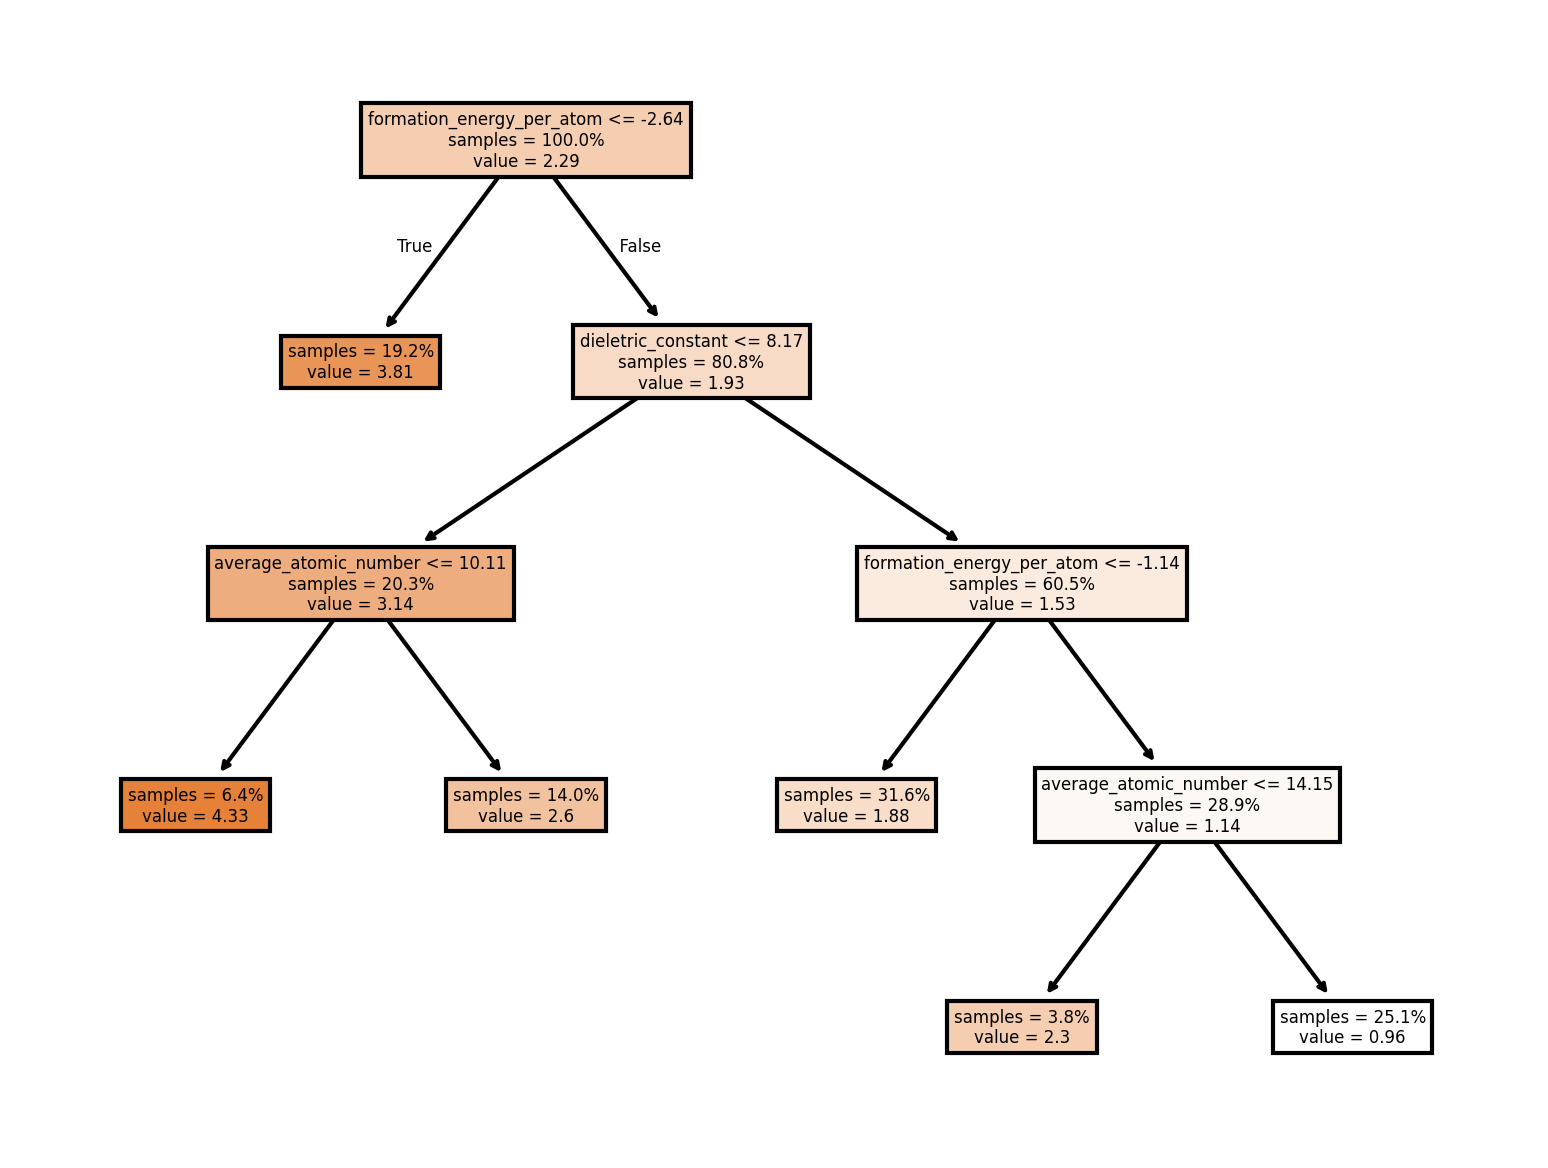

In [15]:
modelo_ad = DecisionTreeRegressor(max_leaf_nodes=6)
modelo_ad.fit(X_treino, y_treino)

figura, eixo = plt.subplots(dpi=300)

tree.plot_tree(
    modelo_ad,
    feature_names=ATRIBUTOS,
    ax=eixo,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
);

Podemos perceber que a Árvore de Decisão é um ótimo modelo caso queremos explicar as relações e os processos de separação para a tomada de decisão, suas divisões e passos são bem claros como visto do gráfico a cima. Então esse modelo é mais importante para estudarmos nossos dados e entender seu formato, mas não apresenta necessáriamente as melhores predições, pensando que existem outras formas mais eficazes em relação à precisão. 

## 🪓🪵Conclusão

Com esse moedelo de predição conseguimos explorar mais os dados e entender como as decisões passam pelas caracteristícas presentes em cada coluna até chegar na escolha de um valor para o band gap. É possível perceber como o uso desse algorítimo não está ligado á uma alta precisão, mas a facilidade em explicar as predições. 

## 📖Referencias


**Histograms in Python**. Disponível em: https://plotly.com/python/histograms/

**Gráficos de dispersão em Python**. Disponível em: https://plotly.com/python/line-and-scatter/

CASSAR, Daniel. **Árvores de decisão**. 2024. Material de aula.

**Otimize sua otimização**. Disponível em: https://optuna.org/

**RMSE (Raiz Do Erro Quadrático Médio) Em Machine Learning**.Disponível em: https://mariofilho.com/rmse-raiz-do-erro-quadratico-medio-em-machine-learning/#:~:text=A%20raiz%20do%20erro%20quadr%C3%A1tico,desempenho%20de%20modelos%20de%20regress%C3%A3o.

**Métricas para Regressão: Entendendo as métricas R², MAE, MAPE, MSE e RMSE**.Disponível em: https://medium.com/data-hackers/prevendo-n%C3%BAmeros-entendendo-m%C3%A9tricas-de-regress%C3%A3o-35545e011e70

#### **Documentações:**

Este projeto utilizou as seguintes bibliotecas:

**Bibliotecas de Terceiros:**

* **`plotly.express`:** [https://plotly.com/python/plotly-express/](https://plotly.com/python/plotly-express/) - Criação de gráficos interativos de alto nível.

* **`optuna`:** [https://optuna.readthedocs.io/en/stable/](https://optuna.readthedocs.io/en/stable/) - Otimização de hiperparâmetros.
* **`pandas`:** [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/) - Manipulação e análise de dados.

* **`matplotlib.pyplot`:** [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) - Criação de gráficos estáticos, interativos e animados.
* **`sklearn.tree`:** [https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) -  Algoritmos de árvore de decisão.
* **`sklearn.model_selection.train_test_split`:** [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) - Divide arrays ou matrizes em subconjuntos aleatórios de treino e teste.
* **`sklearn.tree.DecisionTreeRegressor`:** [https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) - Árvore de decisão para tarefas de regressão.
* **`sklearn.metrics.mean_squared_error`:** [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) - Calcula o erro quadrático médio entre os valores reais e previstos.

## 👣 **Próximos passos**

Este é o Tercério de uma série de 4 notebooks que compõem o trabalho final da disciplina de Aprendizado de Máquina. No próximo caderno, será concluído o trabalho, em que faremos considerações finais e uma análise completa dos passos que fizemos até aqui. Para acompanhar o desenvolvimento do projeto, acesse os notebooks em nosso [git](https://github.com/CaioRuas24010/SepulcroDeDelfos/tree/main/A%20Batalha%20Contra%20Dragao):

1. **[`introducao.ipynb`](https://github.com/CaioRuas24010/SepulcroDeDelfos/blob/main/A%20Batalha%20Contra%20Dragao/introducao.ipynb) - Baixando e organizando os dados**
2. **[`modelo_dos_k-nn_vizinhos.ipynb`](https://github.com/CaioRuas24010/SepulcroDeDelfos/blob/main/A%20Batalha%20Contra%20Dragao/modelo_dos_k-nn_vizinhos.ipynb) - Estudando o modelo k-NN**
3. **[`arvore_de_decisao.ipynb`](https://github.com/CaioRuas24010/SepulcroDeDelfos/blob/main/A%20Batalha%20Contra%20Dragao/arvore_de_decisao.ipynb) - Estudando o modelo Árvore de Decisão**
4. **[`conclusao.ipynb`](https://github.com/CaioRuas24010/SepulcroDeDelfos/blob/main/A%20Batalha%20Contra%20Dragao/conclusao.ipynb) - Resultados e discussões finais** 

---

# **<span style="font-family: 'Palatino Linotype', serif;">A jornada continua...</span>**

*<span style="font-family: 'Angilla Tattoo'"> <br> E assim, com os mapas estelares decifrados e as runas ancestrais traduzidas, os bravos guerreiros concluem sua preparação. <br> <br> A nossa jornada está quase no fim. O caminho e os vários perigos que enfrentamos nos levaram a esse proximo momento. Agora podemos seguir para nossa última batalha no covil do dragão. Finalmente, nossos heróis enfrentarão o ultimo desafio, usando a força da união e o poder da similaridade para desvendar os segredos ancestrais e conquistar a vitória. <br> <br> Que os deuses ancestrais nos abençoem nesse próximo combate! Avante, heróis, rumo ao destino e à glória! <br> <br> Nossos algoritmos são oráculos, nossos dados são ossos ancestrais. <br> Sepulcro de Delfos </span>*